In [1]:
import numpy as np
from typing import List, Tuple
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import os, sys

In [2]:
data_path = '/home/tjy/repos/red-bag-data/all-csv/'

data_files = []
filenames = os.listdir(data_path)
for f in filenames:
    if '.csv' in f:
        data_files.append(os.path.join(data_path, f))

dfs: List[pd.DataFrame] = [pd.read_csv(f) for f in data_files]
dfs[0]

,order,value
0,0,1.23
1,1,6.29
2,2,12.43
3,3,4.13
4,4,1.10
5,5,0.81
6,6,4.73
7,7,10.97
8,8,12.90
9,9,11.41


In [3]:
n_trials = len(dfs)
data_dict = {'order': [i for i in range(10)]}

for i in range(n_trials):
    data_dict['trial_{}'.format(i)] = dfs[i]['value'].tolist()
data = pd.DataFrame(data_dict)
data.set_index('order', inplace=True)
np.savetxt('trials.csv', data.values)
data

,trial_0,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,...,trial_190,trial_191,trial_192,trial_193,trial_194,trial_195,trial_196,trial_197,trial_198,trial_199
order,,,,,,,,,,,,,,,,,,,,,
0,1.23,0.90,6.10,4.10,9.36,3.57,7.65,7.41,0.66,0.84,...,5.09,8.91,9.99,11.14,4.86,0.66,10.45,3.01,10.39,1.82
1,6.29,6.62,1.80,7.46,10.91,3.40,12.19,5.19,3.50,13.39,...,10.30,6.73,4.55,5.26,12.09,9.31,3.23,10.20,5.53,4.25
2,12.43,2.02,13.91,9.81,6.02,3.50,8.55,9.37,9.88,3.04,...,2.47,6.25,8.39,7.93,3.98,9.57,11.09,11.70,0.80,11.29
3,4.13,6.14,2.01,11.83,8.20,11.89,3.17,2.30,9.29,11.28,...,12.94,4.78,10.81,9.88,0.64,10.72,9.53,3.22,12.65,6.21
4,1.10,12.40,7.06,1.27,4.03,10.62,1.37,5.41,4.23,2.99,...,2.78,11.40,3.45,5.78,4.09,6.66,0.90,9.89,11.10,6.12
5,0.81,4.27,0.70,1.31,1.46,10.22,12.25,7.99,11.69,3.07,...,9.45,7.25,10.63,1.90,0.80,0.58,8.78,6.70,3.17,8.25
6,4.73,9.86,12.89,7.40,9.58,10.85,4.88,4.48,4.09,1.47,...,7.09,0.51,7.02,0.60,14.31,9.45,6.54,7.61,6.33,5.55
7,10.97,1.28,2.96,8.71,10.66,3.81,3.61,2.03,11.53,13.35,...,3.40,6.00,3.28,1.21,4.68,5.48,9.20,0.63,6.90,14.44
8,12.90,8.72,10.68,3.04,3.94,2.42,5.99,14.12,5.54,9.28,...,9.82,12.04,6.94,1.50,19.27,6.50,6.10,1.66,8.24,3.47


In [4]:
ex = data.mean(axis=1)
std = data.std(axis=1)

general_data = pd.DataFrame({'e': ex, 'std': std}).reset_index()
general_data.corr()

,order,e,std
order,1.000000,-0.103076,0.899774
e,-0.103076,1.000000,0.045849
std,0.899774,0.045849,1.000000


In [5]:
def plot_hist_for_players(data: pd.DataFrame):
    fig, axs = plt.subplots(3, 4)
    fig.set_size_inches(10.24, 10.24)
    axs = axs.flat
    xlim = np.max(data.values)
    histogram = [np.histogram(data.iloc[i,].values) for i in range(10)]
    hist = [h[0] for h in histogram]
    bins = [h[1] for h in histogram]
    ylim = np.max(hist)
    for i in range(10):
        axs[i].hist(data.iloc[i,], bins=bins[0])
        axs[i].set_title('hist of {}-th'.format(i))
        axs[i].set_xlim([0, xlim])
        axs[i].set_ylim([0, ylim])
    plt.show()


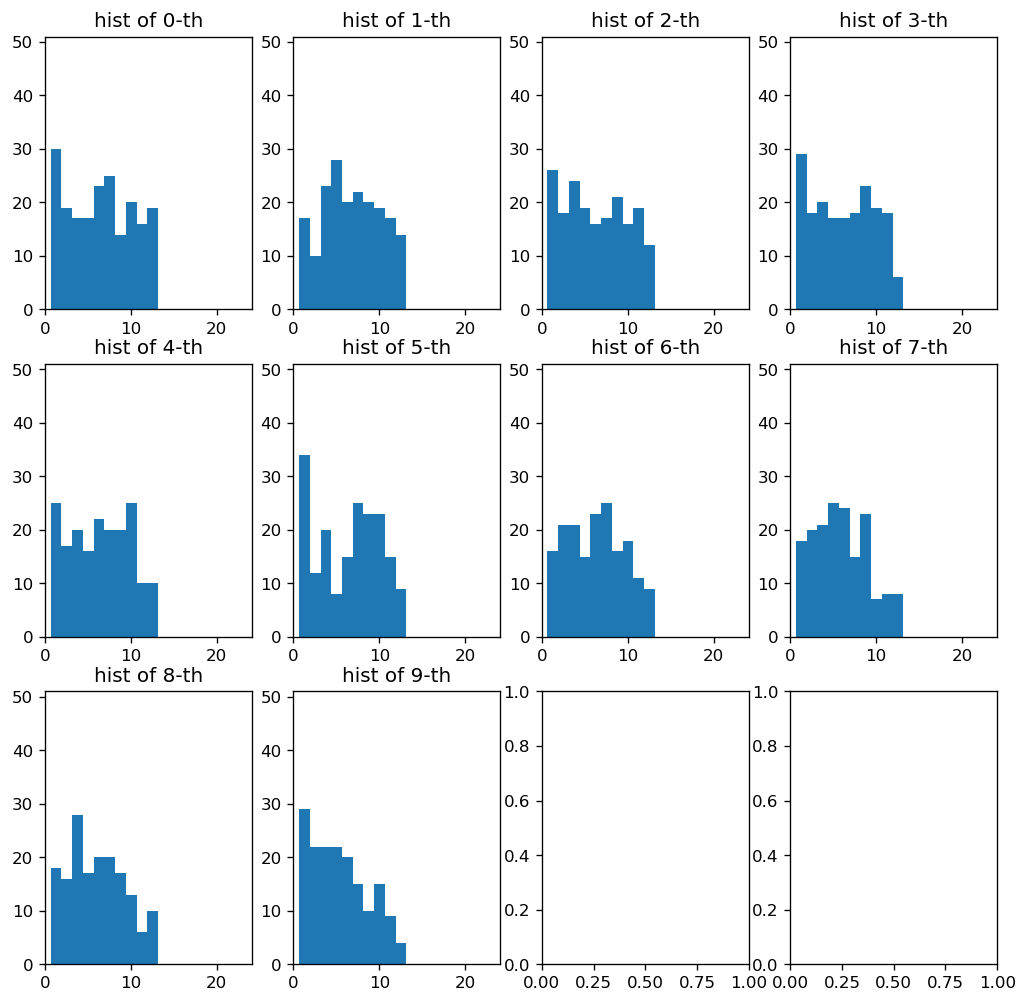

In [6]:
plot_hist_for_players(data)

In [7]:
data_dict = {}
data_sum_value = data.cumsum(axis=0)

data_sum_value_general = pd.DataFrame(
    {
        'mean': data_sum_value.mean(axis=1),
        'std': data_sum_value.std(axis=1),
    }
)

data_sum_value_general

,mean,std
order,,
0,6.52445,3.823247e+00
1,13.53910,5.103564e+00
2,20.05665,5.943838e+00
3,26.41450,6.831429e+00
4,32.99710,6.333741e+00
5,39.61515,6.412154e+00
6,46.13115,6.093648e+00
7,52.69590,5.385188e+00
8,59.91965,4.690813e+00


# Luckiest Players

In [8]:
luckiest_player = np.unique(np.argmax(data.values, axis=0), return_counts=True)
luckiest_player = zip(*luckiest_player)
luckiest_player = pd.DataFrame(luckiest_player, columns=['order', 'counts']).set_index('order')
# luckiest_player

# Least Lucky Players

In [9]:
unluckiest_player = np.unique(np.argmin(data.values, axis=0), return_counts=True)
unluckiest_player = zip(*unluckiest_player)
unluckiest_player = pd.DataFrame(unluckiest_player, columns=['order', 'counts']).set_index('order')
# least_luckiest_player

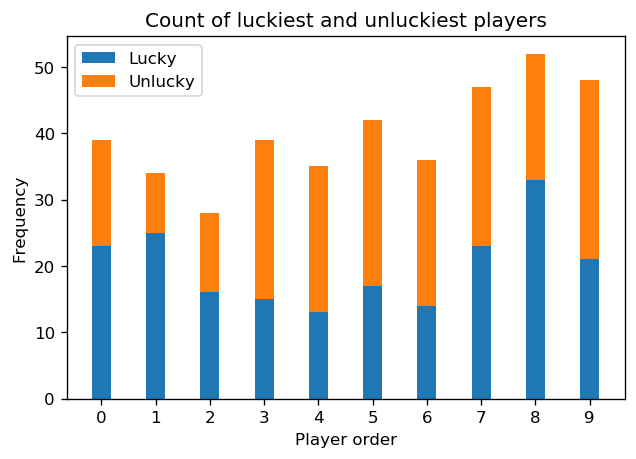

In [10]:
def plot_lucky_n_unlucky_players(data_lucky: pd.DataFrame, data_unlucky: pd.DataFrame, bar_width: float = 0.35):
    labels = [str(i) for i in range(10)]
    lucky = data_lucky.values.flatten().tolist()
    unlucky = data_unlucky.values.flatten().tolist()
    fig, ax = plt.subplots()
    ax.bar(labels, lucky, width=bar_width, label='Lucky')
    ax.bar(labels, unlucky, width=bar_width, bottom=lucky,
           label='Unlucky')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Player order')
    ax.set_title('Count of luckiest and unluckiest players')
    ax.legend()
    plt.show()

plot_lucky_n_unlucky_players(luckiest_player, unluckiest_player)